Data imputation:

Download the dataset  credit-data-post-import-1.csvPreview the document, randomly split your dataset in two datasets: training (75% observations) and testing (25% observations). We'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.

Split our training data into 2 groups; data containing nulls and data not containing nulls on the monthly_income variable. Train on the latter and make 'predictions' on the null data to impute monthly_income using a regression algorithm with the variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans'.

Save your train and test datasets in the csv files: credit-data-trainingset.csv and credit-data-testset.csv.

For this first part, the report can simply compare the number of observations of each dataset (train and test) before and after the correction of null values.

Credit risk:
In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2years: 1 defaults, 0 otherwise).

Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L1
- Logistic regression (LinearSVC) using penalty (regularization) L2
- SVM using penalty (regularization) L2
- Neural networks

Use the best model and select the best parameters using grid search (GridSearchCV).

Train your best model with the training dataset (credit-data-trainingset.csv).

Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 4 algorithms mentioned above.

You should submit two UNCOMPRESSED files: a report and a Python program organized by questions. Please do not copy and paste large parts of the Python program as part of the solutions. Create your tables with the output of your program and EXPLAIN the results. You can also submit a report as a Jupyter notebook saved as an HTML or pdf file. However, you must still submit the Python code file as an independent file.

Remember that all homework exercises, tests and exams that are designated as individual assignments MUST contain the following signed statement before they can be accepted for grading.
_____________________________________________________________________
I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.
Signature Michael DiGregorio Date: 10-06-2019

Download the dataset  credit-data-post-import-1.csvPreview the document, randomly split your dataset in two datasets: training (75% observations) and testing (25% observations). We'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pt
import sklearn as sk
import pandas as pd
import pylab as pl

In [2]:
path = "../../../dataSets/credit-data-post-import-1.csv"
df = pd.read_csv(path)

In [3]:
df.head(5)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Split our training data into 2 groups; data containing nulls and data not containing nulls on the monthly_income variable. Train on the latter and make 'predictions' on the null data to impute monthly_income using a regression algorithm with the variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans'.

<strong>Note: Only the monthly income column has null values, this was confirmed in LibreOffice Calc</strong>

In [5]:
#shuffle the indicies of the train set to make sure the model isn't affected by how
#the data was input
train_split = int(150000*.75)   #split index
shuffle_index_T = np.random.permutation(train_split)   #shuffle it up
train = df[:train_split]    #train is the first 3/4 of the data
t = train.values    #np.ndarray t is the values of the training set
t = t[shuffle_index_T]    #shuffle up the training set
train = pd.DataFrame(t, columns=df.columns)    #make it a dataframe

test = df[train_split:]   #test is the rest


In [6]:
from sklearn.neighbors import KNeighborsRegressor

#We will use the K neighbors regressor to fill in missing values for monthly income in a 
#smart way

income_imputer = KNeighborsRegressor(n_neighbors=4)

#split it up into has nulls and doesn't have nulls    use the latter to impute the former
train_nulls = train[train.monthly_income.isnull()==True]
train_no_nulls = train[train.monthly_income.isnull()==False]

In [7]:
train_no_nulls.corr()  #check that correlation matrix for the entire dataset

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
serious_dlqin2yrs,1.000000,-0.003271,-0.101119,0.119630,-0.002520,-0.019614,-0.028338,0.107940,-0.004580,0.091270,0.043648
revolving_utilization_of_unsecured_lines,-0.003271,1.000000,-0.003620,-0.001292,0.000163,0.007610,-0.009293,-0.001116,0.007623,-0.000985,-0.001260
age,-0.101119,-0.003620,1.000000,-0.049628,-0.000882,0.037614,0.188287,-0.048349,0.064196,-0.044080,-0.205402
number_of_time30-59_days_past_due_not_worse,0.119630,-0.001292,-0.049628,1.000000,-0.002599,-0.010388,-0.045564,0.976683,-0.024871,0.981079,0.001976
debt_ratio,-0.002520,0.000163,-0.000882,-0.002599,1.000000,-0.031931,0.007517,-0.002850,0.020857,-0.002223,0.011851
monthly_income,-0.019614,0.007610,0.037614,-0.010388,-0.031931,1.000000,0.091284,-0.012975,0.128357,-0.011676,0.063633
number_of_open_credit_lines_and_loans,-0.028338,-0.009293,0.188287,-0.045564,0.007517,0.091284,1.000000,-0.073425,0.424814,-0.062863,0.038073
number_of_times90_days_late,0.107940,-0.001116,-0.048349,0.976683,-0.002850,-0.012975,-0.073425,1.000000,-0.041485,0.990014,-0.005828
number_real_estate_loans_or_lines,-0.004580,0.007623,0.064196,-0.024871,0.020857,0.128357,0.424814,-0.041485,1.000000,-0.034559,0.116991
number_of_time60-89_days_past_due_not_worse,0.091270,-0.000985,-0.044080,0.981079,-0.002223,-0.011676,-0.062863,0.990014,-0.034559,1.000000,-0.006817


Pulling out the correlation matrix column for monthly_income 

In [8]:
train_no_nulls.corr().iloc[:,5]    #pull out correlation for monthly_income, the only column with nulls

serious_dlqin2yrs                             -0.019614
revolving_utilization_of_unsecured_lines       0.007610
age                                            0.037614
number_of_time30-59_days_past_due_not_worse   -0.010388
debt_ratio                                    -0.031931
monthly_income                                 1.000000
number_of_open_credit_lines_and_loans          0.091284
number_of_times90_days_late                   -0.012975
number_real_estate_loans_or_lines              0.128357
number_of_time60-89_days_past_due_not_worse   -0.011676
number_of_dependents                           0.063633
Name: monthly_income, dtype: float64

In [9]:
#take out the columns of most significance and use them with the KNeighborsRegressor
cols = ["number_real_estate_loans_or_lines", "number_of_open_credit_lines_and_loans"]

income_imputer.fit(train_no_nulls[cols], train_no_nulls.monthly_income)  #fit that imputer

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [10]:
predicted_mi = income_imputer.predict(train_nulls[cols])   #predict the missing values in the null set

In [11]:
train_nulls["monthly_income"] = predicted_mi     #insert the predicted values into the set
predicted_mi

/home/mycicle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2091.5 , 10162.75,  5044.75, ..., 10162.75,  5009.25,  8047.5 ])

In [12]:
#put the data back together, join the train no nulls and train nulls
train = pd.DataFrame(train_no_nulls.append(train_nulls))

In [13]:
train.describe()     #back to 75% of the total

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,112500.00000,112500.000000,112500.000000,112500.000000,112500.000000,1.125000e+05,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000
mean,0.06656,5.845788,52.257360,0.421636,354.955053,6.622570e+03,8.450747,0.267538,1.020222,0.241573,0.736489
std,0.24926,249.858470,14.770455,4.214763,2057.143469,1.295422e+04,5.136673,4.191150,1.134902,4.177922,1.105600
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.030049,41.000000,0.000000,0.175375,3.733750e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.155548,52.000000,0.000000,0.367103,5.424000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.00000,0.561336,63.000000,0.000000,0.869897,8.000000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.00000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [14]:
#remember that the test set still has nulls 
test["monthly_income_imputed"] = income_imputer.predict(test[cols])
test.head(5)

/home/mycicle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,monthly_income_imputed
112500,0,0.655084,51,0,0.339524,11144.0,16,0,1,0,2.0,7295.5
112501,0,0.379873,44,0,0.067009,5834.0,3,0,0,0,0.0,2091.5
112502,0,0.135986,52,0,0.283953,6000.0,11,0,1,0,0.0,4389.0
112503,0,1.000000,33,0,1.087982,5000.0,5,0,4,0,0.0,12452.5
112504,0,0.875891,43,0,0.256532,13050.0,13,0,1,0,0.0,6218.0


In [15]:
test["monthly_income"] = np.where(test.monthly_income.isnull(), test.monthly_income_imputed, test.monthly_income)

/home/mycicle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
print(pd.value_counts(train.monthly_income.isnull()))
print(pd.value_counts(test.monthly_income.isnull()))

False    112500
Name: monthly_income, dtype: int64
False    37500
Name: monthly_income, dtype: int64


In [17]:
#Time to save the two datasets as seperate csvs
train.to_csv("../../../dataSets/credit-data-trainingset.csv", index=False)
test.to_csv("../../../dataSets/credit-data-testset.csv", index=False)


For this first part, the report can simply compare the number of observations of each dataset (train and test) before and after the correction of null values.

Credit risk:
In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2years: 1 defaults, 0 otherwise).

Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L1
- Logistic regression (LinearSVC) using penalty (regularization) L2
- SVM using penalty (regularization) L2
- Neural networks

Use the best model and select the best parameters using grid search (GridSearchCV).

Train your best model with the training dataset (credit-data-trainingset.csv).


<h2>Machine Learning Models</h2>

In [18]:
#lets break up our data into a coherent train, test, verification and load up our data
train_frame = pd.read_csv("../../../dataSets/credit-data-trainingset.csv")

train_ver_split_index = int(train_frame.shape[0] * .75)  #index of 2/4
shuffle_index_t = np.random.permutation(train_ver_split_index)  #shuffle that up
shuffle_index_v = np.random.permutation(train_frame.shape[0] - train_ver_split_index) #shuffle for ver
predictor_frame = train_frame.drop(columns="serious_dlqin2yrs") #frame for predictors
target_frame = train_frame.serious_dlqin2yrs  #series for target

x = predictor_frame[:train_ver_split_index].values   #x = the first 3/4 of predictors
y = target_frame[:train_ver_split_index].values   #y = first 3/4 of targets
x_v = predictor_frame[train_ver_split_index:].values   #x_v = last 1/4 of predictors
y_v = target_frame[train_ver_split_index:].values   #y_v = last 1/4 of targets

x = x[shuffle_index_t]    #shufffle x and y with the same indicies
y = y[shuffle_index_t]
x_v = x_v[shuffle_index_v]   #shuffle x_v and y_v with the same indicies
y_v = y_v[shuffle_index_v]

x_train = pd.DataFrame(x, columns=predictor_frame.columns)       #turn them all back into dataframes
y_train = pd.DataFrame(y, columns=[target_frame.name])   #need the brackets to make it a list
x_val = pd.DataFrame(x_v, columns=predictor_frame.columns)
y_val = pd.DataFrame(y_v, columns=[target_frame.name])

<h3>Function Definitions</h3>

In [19]:
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def plot_roc_curve(fpr, tpr, label=None):
    pt.plot(fpr, tpr, 'g', linewidth=1.5, label="AUC: "+ str(auc(fpr, tpr)))
    pt.plot([0,1], [0,1], 'b--',label="Random")
    pt.xlabel("False Positive Rate")
    pt.ylabel("True Positive Rate")
    pt.title(label)
    pt.legend()
    pt.show()
def plot_pr_curve_thresholds(precisions, recalls, thresholds, label=None):
    pt.plot(thresholds, precisions[:-1], 'r', linewidth=1.5, label="Precisions")
    pt.plot(thresholds, recalls[:-1], 'b', linewidth=1.5, label="Recalls")
    pt.xlabel("Thresholds")
    pt.title(label)
    pt.legend()
    pt.ylim([0,1])
    pt.show()
def build_cumulative_response_curve(model, xt, yt, xv, yv, scale=100):
    #fit the model
    model.fit(xt, yt)
    
    #get the probability of y_test records being = 1
    y_test_probability_1 = model.predict_proba(xv)[:,1]
    
    #sort these probabilities and the true value in decending order of probability
    order = np.argsort(y_test_probability_1)[::-1]
    y_test_probability_1_sorted = y_test_probability_1[order]
    y_test_sorted = np.array(yv)[order]
    
    #Build a cumulative response curve
    x_cumulative = np.arange(len(y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(y_test_sorted)
    
    #Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative
def plot_cumulative_curve(models):
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_response_curve(models[key], x_train, y_train.values.ravel(), x_val, y_val.values.ravel())
        pt.plot(x_cumulative, y_cumulative, label=key)
    #plot for other details
    pt.plot([0,100], [0,100], 'k--', label="Random")
    pt.xlabel("Percentage of test instances targeted (decreasing score)")
    pt.ylabel("Percentage of positives targeted")
    pt.title("Cumulative Response Curve")
    pt.legend()
    pt.show()
def plot_lift_curve(models):
    #Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_response_curve(models[key], x_train, y_train.values.ravel(), x_val, y_val.values.ravel())
        pt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    #Other details
    pt.plot([0,100], [1,1], 'k--', label="Random")
    pt.xlabel("Percentage of test instances (decreasing score)")
    pt.ylabel("Lift (times)")
    pt.title(key + " Lift Curve")
    pt.legend()
    pt.show()
def get_polynomial(degree, model):
    #Create different powers of x
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("model", model)])
    return pipeline

<h3>Logistic Regression Using L1 Penalty -- Validation</h3>

In [20]:
from sklearn.linear_model import LogisticRegression

logit_l1 = LogisticRegression(penalty='l1', solver='liblinear')

logit_l1.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Cross Val Score</h3>

In [21]:
from sklearn.model_selection import cross_val_score
logit_l1_cv = cross_val_score(logit_l1, x_val, y_val.values.ravel(), cv=5)
logit_l1_cv

array([0.94241024, 0.94204444, 0.94133333, 0.94328889, 0.94185633])

<h3>Precision Recall Curve</h3>

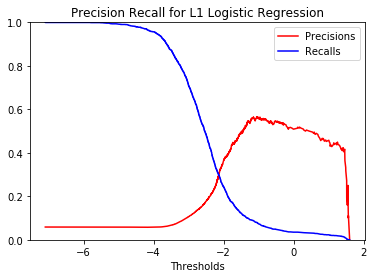

In [22]:
from sklearn.metrics import precision_recall_curve

logit_l1_df = logit_l1.decision_function(x_val)
precisions_l1, recalls_l1, thresholds_l1 = precision_recall_curve(y_val, logit_l1_df)
plot_pr_curve_thresholds(precisions_l1, recalls_l1, thresholds_l1, label="Precision Recall for L1 Logistic Regression")

<h3>ROC Curve</h3>

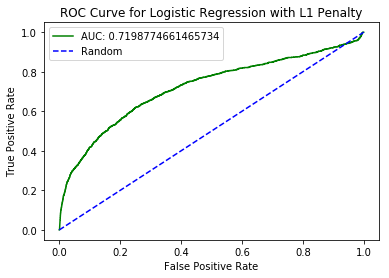

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val.values.ravel(), logit_l1_df)
plot_roc_curve(fpr, tpr, label="ROC Curve for Logistic Regression with L1 Penalty")

<h3>Cumulative Response Curve</h3>

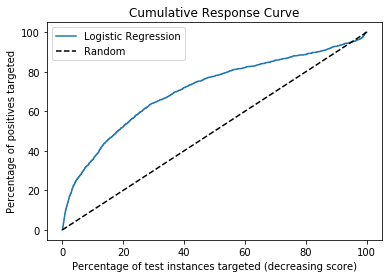

In [24]:
models = {"Logistic Regression" : logit_l1}
plot_cumulative_curve(models)

<h3>Lift Curve</h3>

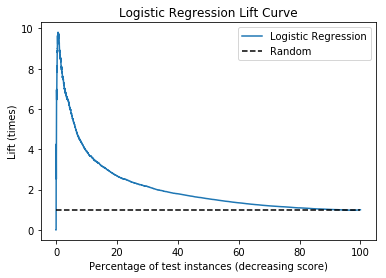

In [25]:
plot_lift_curve(models)

In [26]:
from sklearn.preprocessing import scale
x_scaled = pd.DataFrame(scale(x_train, axis=0, with_mean=True, with_std=True, copy=True), columns=x_train.columns)

In [ ]:

grid = {"polynomial_features__degree": [1, 2, 3], "model__C": [10.0**c for c in np.arange(-2, 3)]}

def Polynomial_Model(degree=1, reg=1):
    return get_polynomial(degree=degree, model=LogisticRegression(C=reg, solver='liblinear', max_iter=1000))

# gridsearchcv behaves just like a model, with fit, predict, and some additional functionalities
tuned_model = GridSearchCV(Polynomial_Model(), grid, scoring="accuracy", cv=10, verbose=1)
tuned_model.fit(x_scaled, y_train.values.ravel())

print ("Best accuracy: %0.3f, using: " % tuned_model.best_score_)
print (tuned_model.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
